<a href="https://colab.research.google.com/github/tinekescode/NeuraleNetwerken/blob/main/Neurale_Netwerken_oefening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neurale Netwerken

Wat je leert in deze cursus:
1. Hoe je packages moet installeren
2. Basis python concepten
3. Inladen van een dataset en deze visualiseren
4. Hoe bouw ik een Neuraal Netwerk
5. Train het netwerk op onze dataset en test of het werkt

## 1. Packages installeren

In [ ]:
# Uncomment these lines if you're in Google Colab or don't have packages installed:
# !pip install numpy
# !pip install matplotlib
# !pip install scikit-learn
# !pip install seaborn
# !pip install pandas

# If you see any errors above, that's normal - it means the packages are already installed.

In [2]:
# Basic math and data handling
import numpy as np              # For mathematical operations
import pandas as pd            # For data manipulation (like Excel for Python)
import matplotlib.pyplot as plt # For creating graphs and charts
import seaborn as sns          # For beautiful statistical plots

# Set up plotting
%matplotlib inline
plt.style.use('seaborn-v0_8')
np.random.seed(42)

# Machine learning tools
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make plots appear in the notebook
%matplotlib inline

# Set random seed for reproducible results
np.random.seed(42)

print("All packages imported successfully!")

All packages imported successfully!


## 2. Basis Python concepten
Voor degenen die nog nooit Python code gezien hebben hier de korte basis Python voor Dummies:

In [3]:
# Variables - like containers that hold data
my_name = "Neural Network Student"
my_age = 25
print(f"Hello! I'm {my_name} and I'm {my_age} years old.")

# Lists - collections of items
fruits = ["apple", "banana", "orange"]
print(f"My favorite fruits: {fruits}")

# Numpy arrays - like lists but for math
numbers = np.array([1, 2, 3, 4, 5])
print(f"Numbers: {numbers}")
print(f"Numbers squared: {numbers**2}")

# Dictionaries - store information with labels
person = {
    "name": "Alice",
    "age": 30,
    "city": "New York"
}
print(f"Person info: {person}")
print(f"Person name: {person['name']}")

Hello! I'm Neural Network Student and I'm 25 years old.
My favorite fruits: ['apple', 'banana', 'orange']
Numbers: [1 2 3 4 5]
Numbers squared: [ 1  4  9 16 25]
Person info: {'name': 'Alice', 'age': 30, 'city': 'New York'}
Person name: Alice


## 3. Inladen en onderzoeken van een dataset

Hieronder gaan we de dataset van iris bloemen inlezen die we gaan gebruiken om ons model te trainen en testen. In deze dataset zitten 150 bloemen van 3 verschillende soorten.

In [4]:
# Load the Iris dataset
iris = load_iris()
print("✅ Dataset loaded successfully!")

# Let's explore what we have
print(f"\nDataset shape: {iris.data.shape}")
print(f"This means: {iris.data.shape[0]} flowers, {iris.data.shape[1]} measurements per flower")

print(f"\nFlower species in our dataset:")
for i, species in enumerate(iris.target_names):
    print(f"  {i}: {species}")

print(f"\nMeasurements we have for each flower:")
for i, feature in enumerate(iris.feature_names):
    print(f"  {i}: {feature}")

✅ Dataset loaded successfully!

Dataset shape: (150, 4)
This means: 150 flowers, 4 measurements per flower

Flower species in our dataset:
  0: setosa
  1: versicolor
  2: virginica

Measurements we have for each flower:
  0: sepal length (cm)
  1: sepal width (cm)
  2: petal length (cm)
  3: petal width (cm)


In [5]:
# Convert to a more user-friendly format
X = iris.data  # The measurements (features)
y = iris.target  # The species (what we want to predict)

# Create a DataFrame - like a spreadsheet in Python
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = [iris.target_names[i] for i in y]

print("First 10 flowers in our dataset:")
print(df.head(10))

print(f"\nDataset summary:")
print(f"Total flowers: {len(df)}")
print(f"Flowers per species:")
print(df['species'].value_counts())

# Basic statistics
print(f"\nBasic statistics for our measurements:")
print(df.describe())

First 10 flowers in our dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
5  setosa  
6  setosa  
7

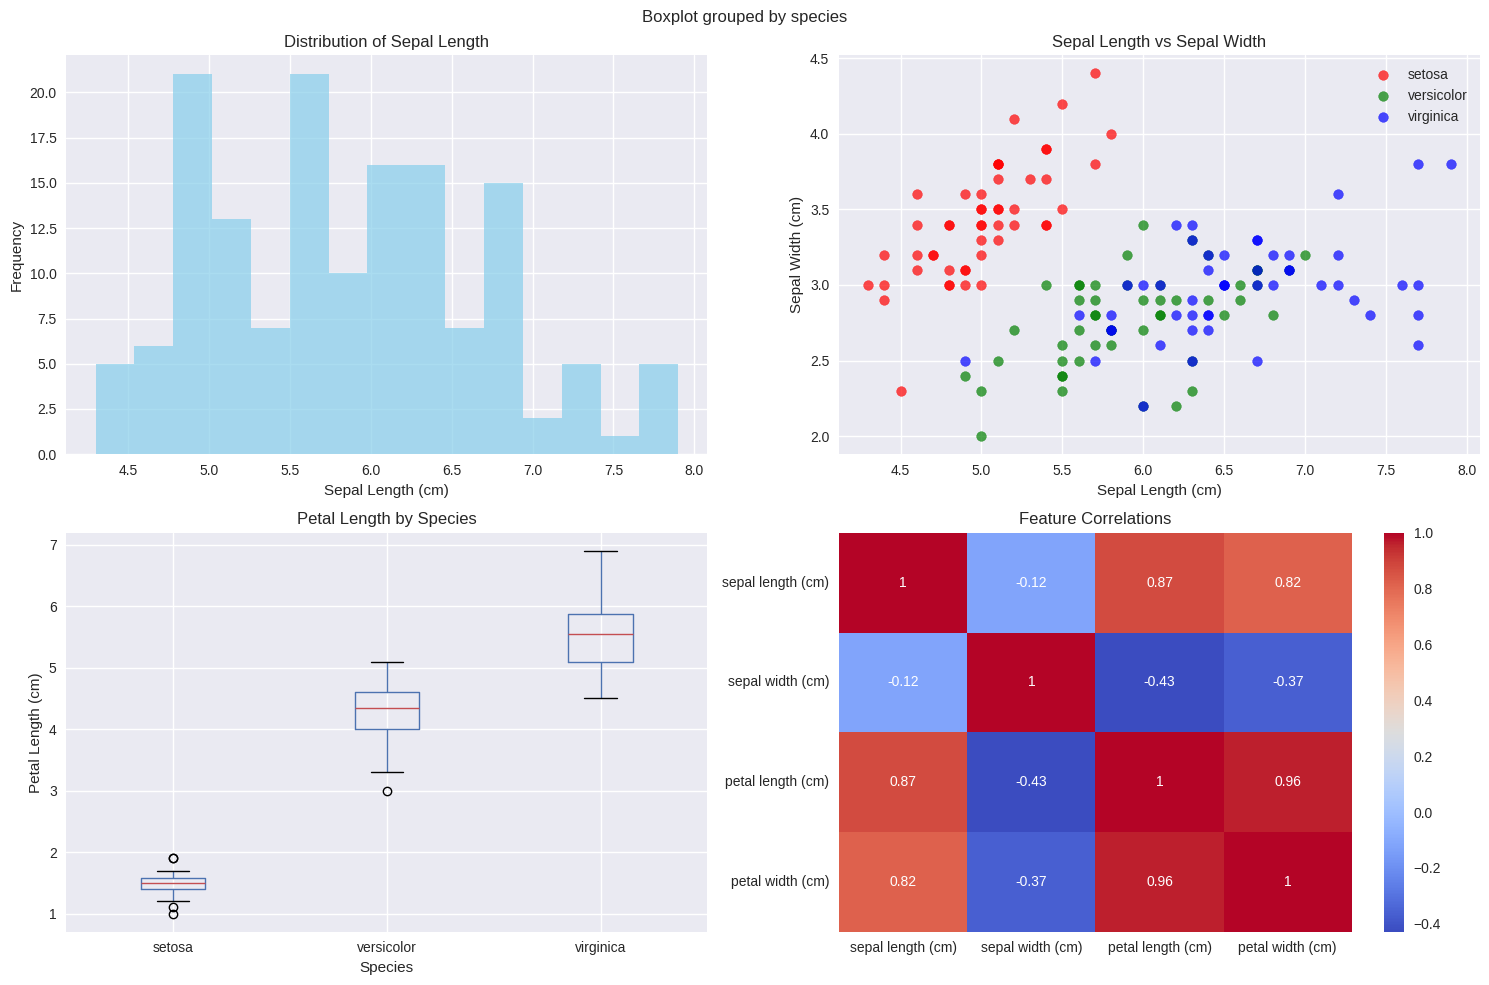

In [6]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Iris Dataset Exploration', fontsize=16, fontweight='bold')

# 1. Histogram of sepal length
axes[0, 0].hist(df['sepal length (cm)'], bins=15, alpha=0.7, color='skyblue')
axes[0, 0].set_title('Distribution of Sepal Length')
axes[0, 0].set_xlabel('Sepal Length (cm)')
axes[0, 0].set_ylabel('Frequency')

# 2. Scatter plot: Sepal length vs Sepal width
colors = ['red', 'green', 'blue']
for i, species in enumerate(iris.target_names):
    mask = df['species'] == species
    axes[0, 1].scatter(df[mask]['sepal length (cm)'],
                      df[mask]['sepal width (cm)'],
                      c=colors[i], label=species, alpha=0.7)
axes[0, 1].set_title('Sepal Length vs Sepal Width')
axes[0, 1].set_xlabel('Sepal Length (cm)')
axes[0, 1].set_ylabel('Sepal Width (cm)')
axes[0, 1].legend()

# 3. Box plot of petal length by species
df.boxplot(column='petal length (cm)', by='species', ax=axes[1, 0])
axes[1, 0].set_title('Petal Length by Species')
axes[1, 0].set_xlabel('Species')
axes[1, 0].set_ylabel('Petal Length (cm)')

# 4. Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Feature Correlations')

plt.tight_layout()
plt.show()

##4. Hoe bouw ik een Neuraal Netwerk

In de onderstaande blokken gaan we daadwerkelijk een Neuraal Netwerk opzetten, trainen en testen.

In [7]:
# Split the data into training and testing sets
# Think of this as: some flowers to learn from, some flowers to test on
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,      # Use 30% for testing
    random_state=42,    # For reproducible results
    stratify=y          # Keep equal proportions of each species
)

print(f"Training set: {X_train.shape[0]} flowers")
print(f"Testing set: {X_test.shape[0]} flowers")

Training set: 105 flowers
Testing set: 45 flowers


In [8]:
# Let's see the distribution in our splits
print(f"\nTraining set species distribution:")
unique, counts = np.unique(y_train, return_counts=True)
for i, count in enumerate(counts):
    print(f"  {iris.target_names[i]}: {count} flowers")

print(f"\nTesting set species distribution:")
unique, counts = np.unique(y_test, return_counts=True)
for i, count in enumerate(counts):
    print(f"  {iris.target_names[i]}: {count} flowers")



Training set species distribution:
  setosa: 35 flowers
  versicolor: 35 flowers
  virginica: 35 flowers

Testing set species distribution:
  setosa: 15 flowers
  versicolor: 15 flowers
  virginica: 15 flowers


In [10]:
# Scale the features (make them all have similar ranges)
# This is like converting all measurements to the same scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✅ Data preparation complete!")
print(f"Original feature ranges:")
print(f"  Sepal length: {X_train[:, 0].min():.2f} to {X_train[:, 0].max():.2f}")
print(f"  Sepal width:  {X_train[:, 1].min():.2f} to {X_train[:, 1].max():.2f}")
print(f"  Petal length: {X_train[:, 2].min():.2f} to {X_train[:, 2].max():.2f}")
print(f"  Petal width:  {X_train[:, 3].min():.2f} to {X_train[:, 3].max():.2f}")

print(f"\nScaled feature ranges:")
print(f"  All features now have mean ≈ 0 and standard deviation ≈ 1")
print(f"  This helps our neural network learn more efficiently!")

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


✅ Data preparation complete!
Original feature ranges:
  Sepal length: 4.30 to 7.90
  Sepal width:  2.00 to 4.40
  Petal length: 1.10 to 6.90
  Petal width:  0.10 to 2.50

Scaled feature ranges:
  All features now have mean ≈ 0 and standard deviation ≈ 1
  This helps our neural network learn more efficiently!
Training data shape: (105, 4)
Testing data shape: (45, 4)


Hieronder een stukje wiskunde die nodig is om het Neurale Netwerk straks te kunnen trainen:

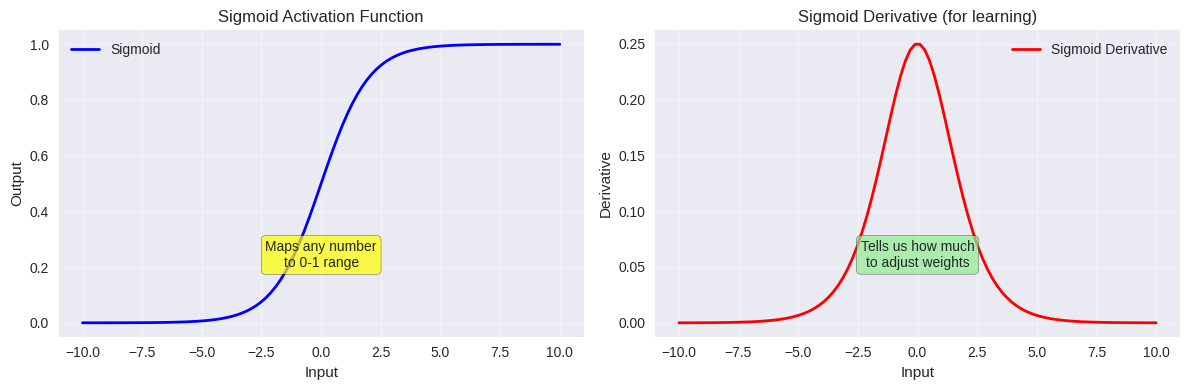

In [13]:
class ActivationFunctions:
    """
    These are the mathematical functions that help neurons make decisions.
    Think of them as the neuron's way of deciding how excited it should be!
    """

    @staticmethod
    def sigmoid(x):
        """
        Sigmoid function: squashes any number to between 0 and 1
        Like a smooth on/off switch for neurons
        """
        # Prevent overflow by clipping extreme values
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def sigmoid_derivative(x):
        """
        Derivative of sigmoid - needed for learning
        """
        return x * (1 - x)

    @staticmethod
    def softmax(x):
        """
        Softmax function: converts numbers to probabilities
        Perfect for classification (which flower species?)
        """
        # Subtract max for numerical stability
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Let's visualize these functions
x = np.linspace(-10, 10, 100)
sigmoid_y = ActivationFunctions.sigmoid(x)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Sigmoid function
ax1.plot(x, sigmoid_y, 'b-', linewidth=2, label='Sigmoid')
ax1.set_title('Sigmoid Activation Function')
ax1.set_xlabel('Input')
ax1.set_ylabel('Output')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.text(0, 0.2, 'Maps any number\nto 0-1 range', ha='center',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

# Sigmoid derivative
sigmoid_deriv = ActivationFunctions.sigmoid_derivative(sigmoid_y)
ax2.plot(x, sigmoid_deriv, 'r-', linewidth=2, label='Sigmoid Derivative')
ax2.set_title('Sigmoid Derivative (for learning)')
ax2.set_xlabel('Input')
ax2.set_ylabel('Derivative')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.text(0, 0.05, 'Tells us how much\nto adjust weights', ha='center',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7))

plt.tight_layout()
plt.show()

Nu we de data hebben gaan we echt een Neuraal Netwerk bouwen.

In [14]:
class SimpleNeuralNetwork:
    """
    Our first neural network! 🧠

    Architecture:
    - Input layer: 4 neurons (for 4 flower measurements)
    - Hidden layer: 8 neurons (the brain of our network)
    - Output layer: 3 neurons (for 3 flower species)
    """

    def __init__(self, input_size=4, hidden_size=8, output_size=3, learning_rate=0.01):
        """
        Initialize our neural network with random weights

        Think of weights as the strength of connections between neurons
        """
        self.learning_rate = learning_rate

        # Initialize weights randomly (small values work better)
        self.weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.1
        self.weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.1

        # Initialize biases to zero
        self.bias_hidden = np.zeros((1, hidden_size))
        self.bias_output = np.zeros((1, output_size))

        # Keep track of training history
        self.training_history = {'loss': [], 'accuracy': []}

        print(f"✅ Neural Network Created!")
        print(f"   Input layer: {input_size} neurons")
        print(f"   Hidden layer: {hidden_size} neurons")
        print(f"   Output layer: {output_size} neurons")
        print(f"   Learning rate: {learning_rate}")

    def forward_pass(self, X):
        """
        Forward pass: data flows from input to output
        This is how the network makes predictions!
        """
        # Input to hidden layer
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = ActivationFunctions.sigmoid(self.hidden_input)

        # Hidden to output layer
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = ActivationFunctions.softmax(self.output_input)

        return self.output

    def backward_pass(self, X, y, output):
        """
        Backward pass: learning happens here!
        The network adjusts its weights based on mistakes
        """
        # Convert y to one-hot encoding
        y_onehot = np.zeros((len(y), 3))
        y_onehot[np.arange(len(y)), y] = 1

        # Calculate error at output layer
        output_error = output - y_onehot

        # Calculate gradients for output layer
        d_weights_hidden_output = np.dot(self.hidden_output.T, output_error) / len(X)
        d_bias_output = np.sum(output_error, axis=0, keepdims=True) / len(X)

        # Calculate error at hidden layer
        hidden_error = np.dot(output_error, self.weights_hidden_output.T) * \
                      ActivationFunctions.sigmoid_derivative(self.hidden_output)

        # Calculate gradients for hidden layer
        d_weights_input_hidden = np.dot(X.T, hidden_error) / len(X)
        d_bias_hidden = np.sum(hidden_error, axis=0, keepdims=True) / len(X)

        # Update weights and biases
        self.weights_hidden_output -= self.learning_rate * d_weights_hidden_output
        self.bias_output -= self.learning_rate * d_bias_output
        self.weights_input_hidden -= self.learning_rate * d_weights_input_hidden
        self.bias_hidden -= self.learning_rate * d_bias_hidden

    def train(self, X, y, epochs=1000, verbose=True):
        """
        Train the neural network!
        """
        if verbose:
            print(f"\n🚀 Starting training for {epochs} epochs...")

        for epoch in range(epochs):
            # Forward pass
            output = self.forward_pass(X)

            # Calculate loss (cross-entropy)
            y_onehot = np.zeros((len(y), 3))
            y_onehot[np.arange(len(y)), y] = 1
            loss = -np.mean(np.sum(y_onehot * np.log(output + 1e-8), axis=1))

            # Calculate accuracy
            predictions = np.argmax(output, axis=1)
            accuracy = np.mean(predictions == y)

            # Store history
            self.training_history['loss'].append(loss)
            self.training_history['accuracy'].append(accuracy)

            # Backward pass (learning!)
            self.backward_pass(X, y, output)

            # Print progress
            if verbose and epoch % 100 == 0:
                print(f"Epoch {epoch:4d}: Loss = {loss:.4f}, Accuracy = {accuracy:.4f}")

        if verbose:
            print(f"✅ Training complete! Final accuracy: {accuracy:.4f}")

    def predict(self, X):
        """
        Make predictions on new data
        """
        output = self.forward_pass(X)
        return np.argmax(output, axis=1)

    def plot_training_history(self):
        """
        Visualize how the network learned over time
        """
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

        # Plot loss
        ax1.plot(self.training_history['loss'], 'b-', linewidth=2)
        ax1.set_title('Training Loss Over Time')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.grid(True, alpha=0.3)

        # Plot accuracy
        ax2.plot(self.training_history['accuracy'], 'g-', linewidth=2)
        ax2.set_title('Training Accuracy Over Time')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy')
        ax2.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

print("✅ Neural Network class created! Ready to train!")

✅ Neural Network class created! Ready to train!


##5. Train het netwerk op onze dataset en test of het werkt

✅ Neural Network Created!
   Input layer: 4 neurons
   Hidden layer: 8 neurons
   Output layer: 3 neurons
   Learning rate: 0.1

🚀 Starting training for 1000 epochs...
Epoch    0: Loss = 1.0848, Accuracy = 0.3333
Epoch  100: Loss = 0.7625, Accuracy = 0.7143
Epoch  200: Loss = 0.5078, Accuracy = 0.8952
Epoch  300: Loss = 0.4166, Accuracy = 0.9619
Epoch  400: Loss = 0.3458, Accuracy = 0.9619
Epoch  500: Loss = 0.2864, Accuracy = 0.9714
Epoch  600: Loss = 0.2399, Accuracy = 0.9714
Epoch  700: Loss = 0.2048, Accuracy = 0.9714
Epoch  800: Loss = 0.1785, Accuracy = 0.9714
Epoch  900: Loss = 0.1588, Accuracy = 0.9714
✅ Training complete! Final accuracy: 0.9714


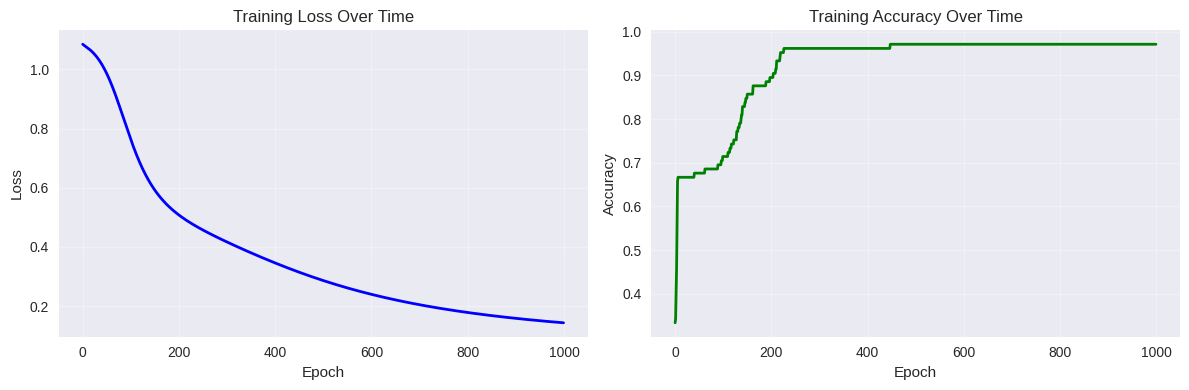

In [16]:
# Create and train the network
nn = SimpleNeuralNetwork(input_size=4, hidden_size=8, output_size=3, learning_rate=0.1)

# Train the network
nn.train(X_train, y_train, epochs=1000, verbose=True)

# Visualize the training process
nn.plot_training_history()

In [18]:
# Make predictions on test data
test_predictions = nn.predict(X_test)
train_predictions = nn.predict(X_train)

# Calculate accuracies
train_accuracy = np.mean(train_predictions == y_train)
test_accuracy = np.mean(test_predictions == y_test)

print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.1f}%)")
print(f"Testing Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.1f}%)")

# Species names for better understanding
species_names = ['Setosa', 'Versicolor', 'Virginica']

# Show some example predictions
print(f"\n=== EXAMPLE PREDICTIONS ===")
for i in range(min(10, len(X_test))):
    actual = species_names[y_test[i]]
    predicted = species_names[test_predictions[i]]
    status = "✅" if y_test[i] == test_predictions[i] else "❌"
    print(f"Flower {i+1}: Actual = {actual:12s}, Predicted = {predicted:12s} {status}")


Training Accuracy: 0.9714 (97.1%)
Testing Accuracy: 1.0000 (100.0%)

=== EXAMPLE PREDICTIONS ===
Flower 1: Actual = Virginica   , Predicted = Virginica    ✅
Flower 2: Actual = Versicolor  , Predicted = Versicolor   ✅
Flower 3: Actual = Virginica   , Predicted = Virginica    ✅
Flower 4: Actual = Versicolor  , Predicted = Versicolor   ✅
Flower 5: Actual = Virginica   , Predicted = Virginica    ✅
Flower 6: Actual = Virginica   , Predicted = Virginica    ✅
Flower 7: Actual = Versicolor  , Predicted = Versicolor   ✅
Flower 8: Actual = Versicolor  , Predicted = Versicolor   ✅
Flower 9: Actual = Setosa      , Predicted = Setosa       ✅
Flower 10: Actual = Virginica   , Predicted = Virginica    ✅


Nog wat uitleg hoe we kunnen zien wat het netwerk geleerd heeft:



=== UNDERSTANDING WHAT THE NETWORK LEARNED ===


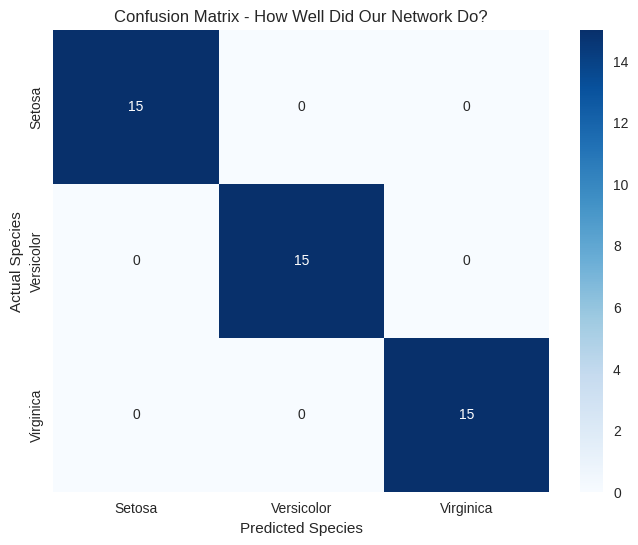

✅ Confusion matrix shows where our network made mistakes!


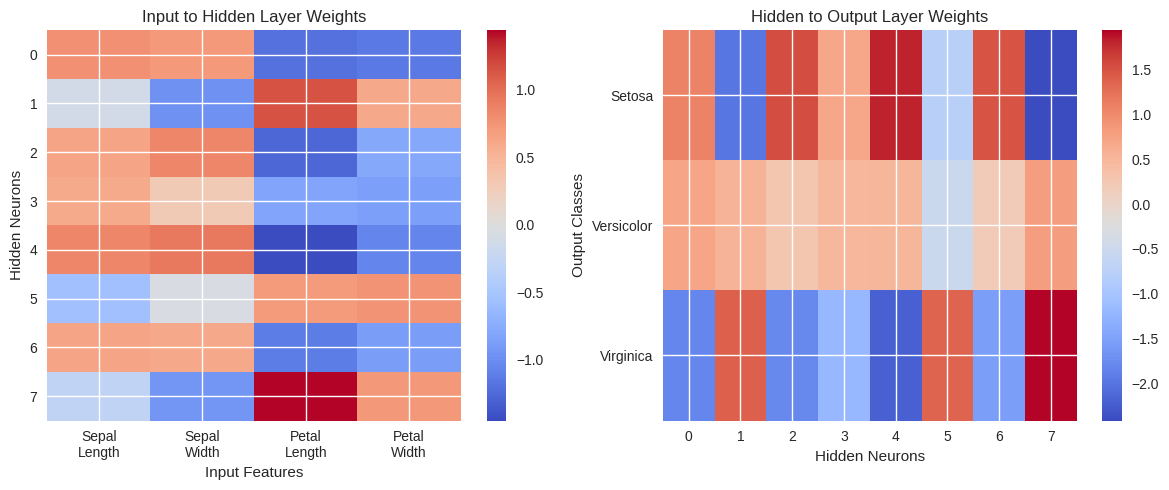

✅ These heatmaps show the strength of connections in your network!


In [19]:
print("\n=== UNDERSTANDING WHAT THE NETWORK LEARNED ===")

# Visualize the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, test_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=species_names, yticklabels=species_names)
plt.title('Confusion Matrix - How Well Did Our Network Do?')
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.show()

print("✅ Confusion matrix shows where our network made mistakes!")

# Visualize the network's weights
def visualize_network_weights(nn):
    """
    Visualize what the network learned
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Input to hidden weights
    im1 = ax1.imshow(nn.weights_input_hidden.T, cmap='coolwarm', aspect='auto')
    ax1.set_title('Input to Hidden Layer Weights')
    ax1.set_xlabel('Input Features')
    ax1.set_ylabel('Hidden Neurons')
    ax1.set_xticks(range(4))
    ax1.set_xticklabels(['Sepal\nLength', 'Sepal\nWidth', 'Petal\nLength', 'Petal\nWidth'])
    plt.colorbar(im1, ax=ax1)

    # Hidden to output weights
    im2 = ax2.imshow(nn.weights_hidden_output.T, cmap='coolwarm', aspect='auto')
    ax2.set_title('Hidden to Output Layer Weights')
    ax2.set_xlabel('Hidden Neurons')
    ax2.set_ylabel('Output Classes')
    ax2.set_yticks(range(3))
    ax2.set_yticklabels(species_names)
    plt.colorbar(im2, ax=ax2)

    plt.tight_layout()
    plt.show()

visualize_network_weights(nn)
print("✅ These heatmaps show the strength of connections in your network!")

## Gebruik het netwerk
Nu het netwerk getraind en getest is kan het gebruikt worden om nieuwe data in een categorie te plaatsen (de reden van het testen van een netwerk).

In [20]:
def predict_flower(sepal_length, sepal_width, petal_length, petal_width):
    """
    Predict the species of a new flower
    """
    # Create input array
    new_flower = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

    # We need to scale it the same way as our training data
    # For simplicity, we'll use approximate scaling
    # In practice, you'd use the same scaler from training
    scaled_flower = (new_flower - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)

    # Make prediction
    prediction = nn.predict(scaled_flower)[0]
    probabilities = nn.forward_pass(scaled_flower)[0]

    print(f"🌸 New flower measurements:")
    print(f"   Sepal length: {sepal_length} cm")
    print(f"   Sepal width:  {sepal_width} cm")
    print(f"   Petal length: {petal_length} cm")
    print(f"   Petal width:  {petal_width} cm")
    print(f"\n🤖 Neural Network Prediction: {species_names[prediction]}")
    print(f"\n📊 Confidence scores:")
    for i, (species, prob) in enumerate(zip(species_names, probabilities)):
        print(f"   {species:12s}: {prob:.3f} ({prob*100:.1f}%)")

# Test with some example flowers
print("Testing with example flowers:")
print("\n" + "="*50)
predict_flower(5.0, 3.5, 1.5, 0.3)  # Typical Setosa
print("\n" + "="*50)
predict_flower(6.0, 3.0, 4.5, 1.5)  # Typical Versicolor
print("\n" + "="*50)
predict_flower(7.0, 3.2, 6.0, 2.0)  # Typical Virginica

Testing with example flowers:

🌸 New flower measurements:
   Sepal length: 5.0 cm
   Sepal width:  3.5 cm
   Petal length: 1.5 cm
   Petal width:  0.3 cm

🤖 Neural Network Prediction: Setosa

📊 Confidence scores:
   Setosa      : 0.970 (97.0%)
   Versicolor  : 0.030 (3.0%)
   Virginica   : 0.000 (0.0%)

🌸 New flower measurements:
   Sepal length: 6.0 cm
   Sepal width:  3.0 cm
   Petal length: 4.5 cm
   Petal width:  1.5 cm

🤖 Neural Network Prediction: Versicolor

📊 Confidence scores:
   Setosa      : 0.046 (4.6%)
   Versicolor  : 0.737 (73.7%)
   Virginica   : 0.217 (21.7%)

🌸 New flower measurements:
   Sepal length: 7.0 cm
   Sepal width:  3.2 cm
   Petal length: 6.0 cm
   Petal width:  2.0 cm

🤖 Neural Network Prediction: Virginica

📊 Confidence scores:
   Setosa      : 0.006 (0.6%)
   Versicolor  : 0.390 (39.0%)
   Virginica   : 0.604 (60.4%)
